In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('general_data.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Checking for NULLs

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Dropping Null Values

In [ ]:
df.dropna(inplace=True)

# Dropping Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

# Describe deatils of Data Frame

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
df.var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.617192e+06
JobLevel                   1.223490e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
StockOptionLevel           7.265814e-01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [ ]:
df.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
EmployeeCount              0.000000
EmployeeID                -0.002335
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [ ]:
df.kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeCount              0.000000
EmployeeID                -1.198607
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f144057b390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f144057bda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14405a3860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f14405a34e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f144057b6a0>,
  <matplotlib.lines.Line2D at 0x7f144057ba20>]}

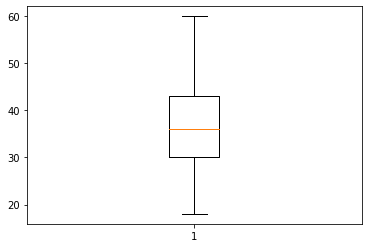

In [ ]:
plt.boxplot(df.Age)

{'boxes': [<matplotlib.lines.Line2D at 0x7f14404bcc88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f14404de6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f144001d198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f14404dedd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f14404bcf98>,
  <matplotlib.lines.Line2D at 0x7f14404de358>]}

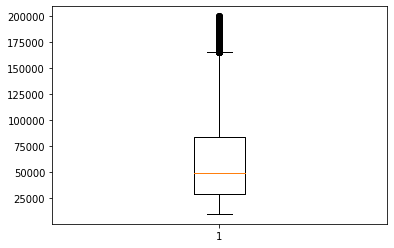

In [ ]:
plt.boxplot(df.MonthlyIncome)

{'boxes': [<matplotlib.lines.Line2D at 0x7f143fff4b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1440000550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1440000fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1440000c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f143fff4e10>,
  <matplotlib.lines.Line2D at 0x7f14400001d0>]}

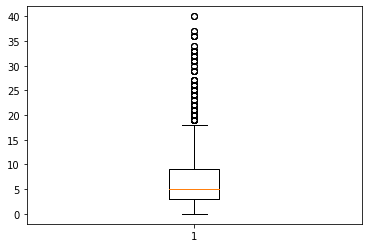

In [ ]:
plt.boxplot(df.YearsAtCompany)

In [ ]:
df['Attrition'].replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)

# Hypothesis

### Hypothesis -1

The employee with average age of 35, has more attrition.

Null Hypothesis

Age and Attrition have no attrition

Alternative Hypothesis

Age and Attrition have correalation

In [ ]:
stats,p = pearsonr(df['Attrition'], df['Age'])
print(stats, p)

-0.1583986795409671 5.1265982193780794e-26


r = -0.1583986795409671

p = 5.1265982193780794e-26

r is negative and p<0.05. So Null Hypothesis (H0) is rejected and negative correlation between attrition and age.

### Hypothesis 2

The attrition based on all the category of education.

Null Hypothesis

Education and Attrition have correlation

Alternative Hypothesis

Education and Attrition have no correlation

In [ ]:
stats, p = pearsonr(df['Attrition'], df['Education'])
print(stats,p)

-0.01710630705027876 0.25757539308157945


r = -0.01710630705027876

p = 0.25757539308157945

r is negative and p>0.05. So Null hypothesis is accepted and negative correlation between attrition and eduction.

### Hypothesis 3

Attrition and Distance from home is having no correlation.

Null Hypothesis

Attrition and Distance from home is havinf no correlation

Alternative Hypothesis

Attrition and distance from home is having correlation



In [ ]:
stats,p = pearsonr(df['Attrition'], df['DistanceFromHome'])
print(stats,p)

-0.009448638515156291 0.5317715668018396


r = -0.009448638515156291

p = 0.5317715668018396

As r is negative and p<0.05. So null hypothesis is rejected and we find the there is a negative correlation between attrition and age.

### Hypothesis 4

The employee, who are working with current manager more than 2.5 years

Null Hypothesis

Year With Curr Manager and Attrition have no correlation

Alternative Hypothesis

YearsWith Curr Manager and Attrition have correlation.

In [25]:
stats,p = pearsonr(df['Attrition'],df['YearsWithCurrManager'])
print(stats,p)

-0.15469153690287285 7.105369646772844e-25


r = -0.15469153690287285

p = 7.105369646772844e-25

r is negative and p<0.05, so Null Hypothesis is rejected and negative correlation between attrition and years with curr Manager.

### Hypothesis 5

If the emplyee has more than one years of exprince, after promotion has less atrrition

Null Hypothesis

YearsSinceLastPromotion and Attrition have no correlation

Alternative Hypothesis

YearsSinceLastPromotion and Attrition have correlation


In [26]:
stats,p = pearsonr(df['Attrition'], df['YearsSinceLastPromotion'])
print(stats,p)

-0.03142315056330998 0.03752293607394324


r = -0.03142315056330998

p = 0.03752293607394324

r is negative and p<0.05. So Null Hypothesis is rejected.

Negative correlation between attrition and Years Since Last Promotion.

### Hypothesis 6

The employee who worked more than 5 years have high attrition rate

Null Hypothesis

Years At Company and Attrition have no correlation

Alternative Hypothesis

Years at company and Attrition have correlation

In [27]:
stats,p = pearsonr(df['Attrition'], df['YearsAtCompany'])
print(stats,p)

-0.13300261842521535 9.476118084840815e-19


r = -0.13300261842521535

p = 9.476118084840815e-19

r is negative and p<0.05. so Null Hypothesis is rejected and negative correlation between attrition and Years At Company.

### Hypothesis 7

The employee, who are getting less than or equal to 13% has more attrition.

Null Hypothesis

Precent Salary Hike and Attrition have no correlation

Alternative Hypothesis

Percent Salary Hike and Attrition have correlation


In [28]:
stats,p = pearsonr(df['Attrition'], df['PercentSalaryHike'])
print(stats,p)

0.033153037135466544 0.028192446935112747


r = 0.033153037135466544

p = 0.028192446935112747

r is postive and p<0.05. So Null Hypothesis is rejected and positive correlation between attrition and Precent Salary Hike.

### Hypothesis 8

Eployee having Joblevel less than or equal to 2 have hight attrition rate

Null Hypothesis

Joblevel and Attrition have correlation

Alternative Hypothesis

Joblevel and Attrition have no correlation

In [29]:
stats,p = pearsonr(df['Attrition'], df['JobLevel'])
print(stats,p)

-0.012381569720790884 0.4125489150380087


r = -0.012381569720790884

p = 0.4125489150380087

r is negative and p>0.05. So Null hypothesis is accepted and negative correlation between attrition and JobLevel.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007376,-0.033900,nan,0.008105,-0.001137,-0.045163,0.299527,-0.032561,nan,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
DistanceFromHome,0.007376,1.000000,-0.007491,nan,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,nan,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.007491,1.000000,nan,-0.009389,0.045822,0.007289,-0.016210,-0.041054,nan,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeID,0.008105,-0.000326,-0.009389,nan,1.000000,-0.003090,0.007865,0.000719,-0.004877,nan,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
JobLevel,-0.001137,-0.039990,0.045822,nan,-0.003090,1.000000,0.046688,-0.009759,0.010874,nan,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.022757,0.007289,nan,0.007865,0.046688,1.000000,-0.021446,0.004607,nan,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,-0.014449,-0.016210,nan,0.000719,-0.009759,-0.021446,1.000000,0.030064,nan,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372
PercentSalaryHike,-0.032561,0.037720,-0.041054,nan,-0.004877,0.010874,0.004607,0.030064,1.000000,nan,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687
StandardHours,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


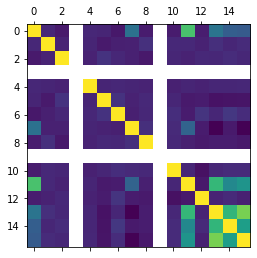

In [ ]:
plt.matshow(df.corr())
plt.show()